# Đồ án tốt nghiệp Data Science

Danh sách thành viên:
*   Nguyễn Phạm Duy
*   Phạm Mạch Lam Phương

## Project 1: Customer Segmentation
> Cửa hàng X chủ yếu bán các sản phẩm thiết yếu cho khách hàng như rau, củ, quả, thịt, cá, trứng, sữa, nước giải khát... Khách hàng của cửa hàng là khách hàng mua lẻ.


> Chủ cửa hàng X mong muốn có thể bán được nhiều hàng hóa hơn cũng như giới thiệu sản phẩm đến đúng đối tượng khách hàng, chăm sóc và làm hài lòng khách hàng.

## Bước 1: Business Understanding
Xây dựng hệ thống phân cụm khách hàng dựa trên các thông tin do cửa hàng cung cấp từ đó có thể giúp cửa hàng xác định các nhóm khách hàng khác nhau để có chiến lược kinh doanh, chăm sóc khách hàng phù hợp.

## Bước 2: Data Understanding
Cung cấp 2 tập dữ liệu

*   Products_with_Categories.csv: toàn bộ sản phẩm của cửa hàng kèm theo giá và loại sản phẩm

*   Transactions.csv: thông tin các giao dịch của khách hàng gồm: Member_number, Date, productId, Items


In [76]:
# Import thư viện
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [77]:

import pickle
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
!pip install squarify -qqq
import squarify

In [78]:
# Đọc file Products_with_Categories.csv
df_cat = pd.read_csv('/content/gdrive/MyDrive/DL07_K302_NguyenPhamDuy_PhamMachLamPhuong/Project1_Customer_Segmentation/data/Products_with_Categories.csv')
df_cat.head()

,productId,productName,price,Category
0,1,tropical fruit,7.8,Fresh Food
1,2,whole milk,1.8,Dairy
2,3,pip fruit,3.0,Fresh Food
3,4,other vegetables,0.8,Fresh Food
4,5,rolls/buns,1.2,Bakery & Sweets


File Products_with_Categories.csv là danh sách toàn bộ các sản phẩm của của hàng bao gồm các thuộc tính:
*   productId: Mã sản phẩm
*   productName: Tên sản phẩm
*   price: Giá sản phẩm
*   Category: Tên danh mục hàng hoá

In [79]:
# Đọc file Products_with_Categories.csv
df_txn = pd.read_csv('/content/gdrive/MyDrive/DL07_K302_NguyenPhamDuy_PhamMachLamPhuong/Project1_Customer_Segmentation/data/Transactions.csv')
df_txn.head()

,Member_number,Date,productId,items
0,1808,21-07-2015,1,3
1,2552,05-01-2015,2,1
2,2300,19-09-2015,3,3
3,1187,12-12-2015,4,3
4,3037,01-02-2015,2,1


File Transactions.csv là thông tin các giao dịch của khách hàng bao gồm các thuộc tính:
*   Member_numbẻr: Mã khách hàng
*   Date: Ngày thực hiện giao dịch
*   productId: Mã sản phẩm
*   items: Số lượng sản phẩm được mua

# Bước 3: Data Preparation/ Prepare

In [80]:
# Ta thực hiện nối hai Data Frames trước khi thực hiện các bước tiếp theo
df = df_txn.merge(df_cat, on="productId", how="left")
df.head()

,Member_number,Date,productId,items,productName,price,Category
0,1808,21-07-2015,1,3,tropical fruit,7.8,Fresh Food
1,2552,05-01-2015,2,1,whole milk,1.8,Dairy
2,2300,19-09-2015,3,3,pip fruit,3.0,Fresh Food
3,1187,12-12-2015,4,3,other vegetables,0.8,Fresh Food
4,3037,01-02-2015,2,1,whole milk,1.8,Dairy


In [81]:
# Ta tạo thêm feature total để tính tổng số tiền mỗi giao dịch
df['total'] = df['price'] * df['items']
df.head()

,Member_number,Date,productId,items,productName,price,Category,total
0,1808,21-07-2015,1,3,tropical fruit,7.8,Fresh Food,23.4
1,2552,05-01-2015,2,1,whole milk,1.8,Dairy,1.8
2,2300,19-09-2015,3,3,pip fruit,3.0,Fresh Food,9.0
3,1187,12-12-2015,4,3,other vegetables,0.8,Fresh Food,2.4
4,3037,01-02-2015,2,1,whole milk,1.8,Dairy,1.8


In [82]:
# Kiểm tra dữ liệu
print(df.shape)
print("Dữ liệu có " + str(df.shape[0]) + " dòng và "  + str(df.shape[1]) + " cột.")

(38765, 8)
Dữ liệu có 38765 dòng và 8 cột.


In [83]:
# Xem các biến trong dataframe
df.columns

Index(['Member_number', 'Date', 'productId', 'items', 'productName', 'price',
       'Category', 'total'],
      dtype='object')

In [84]:
#Có bao nhiêu sản phẩm khác nhau?
df["productName"].nunique()

167

In [85]:
#Có bao nhiêu khách hàng khác nhau?
df["Member_number"].nunique()

3898

In [86]:
#Sản phẩm nào mang lại doanh thu cao nhất?
df.groupby("productName")["total"].sum().sort_values(ascending=False).head(10)

,total
productName,
beef,20007.0
tropical fruit,16426.8
napkins,14584.2
curd,9790.2
specialty chocolate,9155.6
whole milk,9106.2
hamburger meat,8081.1
chocolate,8027.0
pork,8006.4


In [87]:
#Danh mục nào có tổng doanh thu cao nhất?
df.groupby("Category")["total"].sum().sort_values(ascending=False)

,total
Category,
Fresh Food,118033.35
Dairy,56145.44
Bakery & Sweets,41928.58
Household & Hygiene,35650.74
Beverages,35456.30
Frozen & Processed Food,14391.72
Pantry Staples,9867.95
Specialty & Seasonal,8889.90
Pet Care,6425.80


In [88]:
#Sản phẩm nào bán chạy nhất (số lượng mua nhiều nhất)?
df.groupby("productName")["items"].sum().sort_values(ascending=False).head(10)


,items
productName,
whole milk,5059
other vegetables,3787
rolls/buns,3373
soda,3004
yogurt,2674
root vegetables,2123
tropical fruit,2106
bottled water,1862
sausage,1859


In [89]:
#Danh mục nào có tổng số lượng bán cao nhất?
df.groupby("Category")["items"].sum().sort_values(ascending=False)

,items
Category,
Fresh Food,22927
Dairy,15115
Beverages,12030
Bakery & Sweets,11867
Household & Hygiene,4357
Frozen & Processed Food,3695
Pantry Staples,3138
Specialty & Seasonal,2368
Snacks,930


In [90]:
# Kiểm tra dữ liệu trùng
print(df.duplicated().sum())
print("Tập dữ liệu có " + str(df.duplicated().sum()) + " dòng nào bị trùng")

244
Tập dữ liệu có 244 dòng nào bị trùng


In [91]:
# Xóa các dòng dữ liệu bị trùng
df.drop_duplicates(keep='first', inplace=True)

In [92]:
print(df.duplicated().sum())
print("Sau khi xoá trùng, tập dữ liệu có " + str(df.duplicated().sum()) + " dòng nào bị trùng")

0
Sau khi xoá trùng, tập dữ liệu có 0 dòng nào bị trùng


In [93]:
# Kiểm tra dữ liệu NULL
df.info()
print("\nTập dữ liệu không có giá trị null")

<class 'pandas.core.frame.DataFrame'>
Index: 38521 entries, 0 to 38764
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Member_number  38521 non-null  int64  
 1   Date           38521 non-null  object 
 2   productId      38521 non-null  int64  
 3   items          38521 non-null  int64  
 4   productName    38521 non-null  object 
 5   price          38521 non-null  float64
 6   Category       38521 non-null  object 
 7   total          38521 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 2.6+ MB

Tập dữ liệu không có giá trị null


In [94]:
# Ta thấy các feature Date mang ý nghĩa ngày tháng, thực hiện biến đổi kiểu dữ liệu cho cột Date
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

In [95]:
# Ta thực hiện biến đổi kiểu dữ liệu các thuộc tính Member_number, producId thành kiểu object vì các biến này không mang ý nghĩa biến số liên tuc
df[['Member_number', 'productId']] = df[['Member_number', 'productId']].astype(object)

In [96]:
# Sau khi biến đổi, các feature đã đúng kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38521 entries, 0 to 38764
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Member_number  38521 non-null  object        
 1   Date           38521 non-null  datetime64[ns]
 2   productId      38521 non-null  object        
 3   items          38521 non-null  int64         
 4   productName    38521 non-null  object        
 5   price          38521 non-null  float64       
 6   Category       38521 non-null  object        
 7   total          38521 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.6+ MB


## EDA dữ liệu

In [97]:
df.describe(include='all')

,Member_number,Date,productId,items,productName,price,Category,total
count,38521.0,38521,38521.0,38521.000000,38521,38521.000000,38521,38521.000000
unique,3898.0,NaN,167.0,NaN,167,NaN,11,NaN
top,3180.0,NaN,2.0,NaN,whole milk,NaN,Fresh Food,NaN
freq,36.0,NaN,2455.0,NaN,2455,NaN,11426,NaN
mean,NaN,2015-01-09 11:24:59.493782528,NaN,1.996729,NaN,4.305367,NaN,8.590893
min,NaN,2014-01-01 00:00:00,NaN,1.000000,NaN,0.300000,NaN,0.300000
25%,NaN,2014-07-12 00:00:00,NaN,1.000000,NaN,1.250000,NaN,2.400000
50%,NaN,2015-01-20 00:00:00,NaN,2.000000,NaN,2.500000,NaN,5.200000
75%,NaN,2015-07-10 00:00:00,NaN,3.000000,NaN,6.100000,NaN,10.500000
max,NaN,2015-12-30 00:00:00,NaN,3.000000,NaN,28.500000,NaN,85.500000


Dựa vào bảng thống kê về dữ liệu bán hàng tại cửa hàng, ta thấy được:
- Dữ liệu bao gồm các thông tin bán hàng trong vòng 2 năm 2014 và 2015.
- Trong vòng 2 năm, cửa hàng có 3898 khách hàng từng phát sinh giao dịch và có 167 sản phẩm có phát sinh giao dịch.
- Sản phẩm có giá bán cao nhất với 28.5 đô và thấp nhất là 0.3 đô.
- Giao dịch có tổng số tiền cao nhất là 85.5 đô và thấp nhất là đơn hàng có số tiền 0.3 đô.
- Trung bình một giao dịch sẽ có từ 2 items và giá trị trung bình của một đơn hàng là 8.5 đô.
- Khách hàng 3180 có số lượng giao dịch nhiều nhất với 36 lần.
- Sản phẩm xuất hiện nhiều giao dịch nhất là 2 (whole milk) thuộc Catgory Fresh Food với 2455 lần.


# Phân tích biến số

<Axes: xlabel='total', ylabel='Density'>

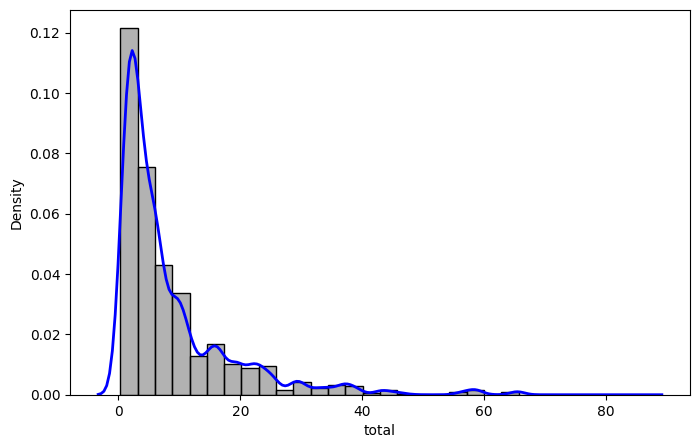

In [98]:
# Phân tích biến total
plt.figure(figsize=(8, 5))

sns.histplot(df['total'], bins=30, color="grey", alpha=0.6, stat="density", label="Histogram")
sns.kdeplot(df['total'], color="blue", linewidth=2,  label="KDE Density")

Nhìn vào biểu đồ ta thấy, chủ yếu các giao dịch nằm trong khoảng từ 0 đến 10 đô. Dữ liệu lệch phải nhiều.

<Axes: xlabel='price', ylabel='Density'>

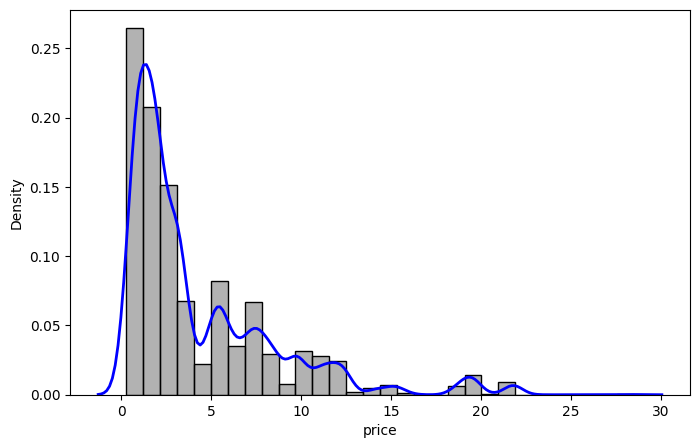

In [99]:
# Phân tích biến price
plt.figure(figsize=(8, 5))

sns.histplot(df['price'], bins=30, color="grey", alpha=0.6, stat="density", label="Histogram")
sns.kdeplot(df['price'], color="blue", linewidth=2,  label="KDE Density")

Nhìn vào biểu đồ ta thấy, chủ yếu cửa hàng bán chạy các mặt hàng có giá bán từ 0 đến 5 đô la.

# Phân tích biến phân loại

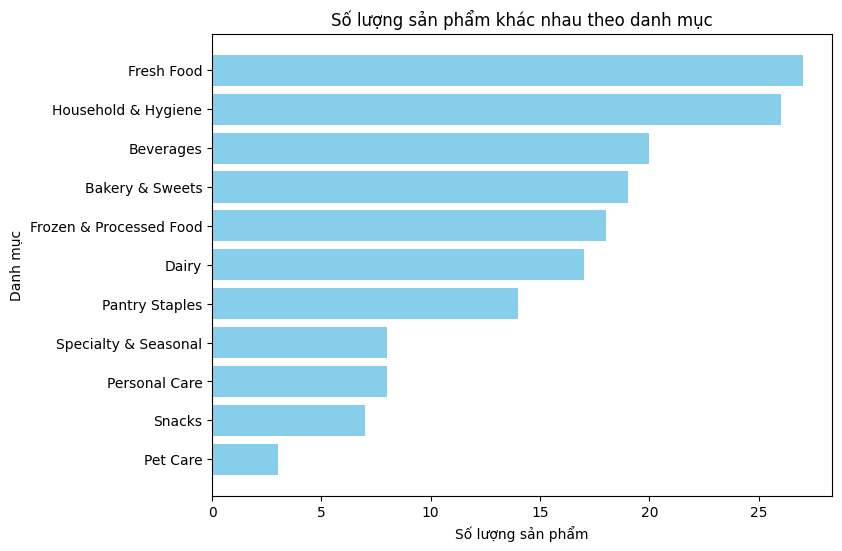

In [100]:
pv_sales_by_cat = df.pivot_table(index='Category', values='productId', aggfunc=pd.Series.nunique).sort_values(by='productId', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(pv_sales_by_cat.index, pv_sales_by_cat['productId'], color='skyblue')
plt.xlabel("Số lượng sản phẩm")
plt.ylabel("Danh mục")
plt.title("Số lượng sản phẩm khác nhau theo danh mục")
plt.show()

Biểu đồ cột cho thấy, cửa hàng bán nhiều các sản phẩm tươi sống (Fresh Food), sản phẩm tẩy rửa vệ sinh (Household & Hygiene), đồ uống (Beverages) và bánh ngọt (Bakery & Sweet).

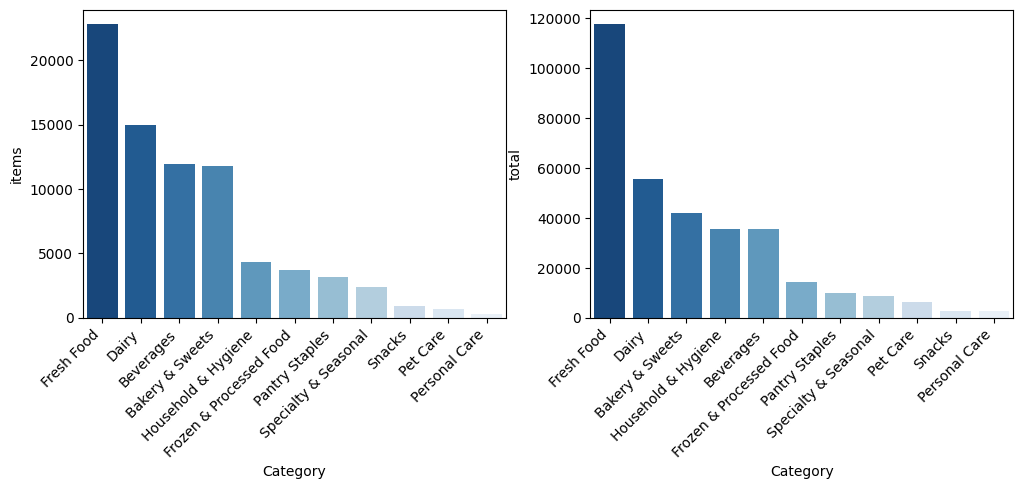

In [101]:
# Ta tiến hành khảo sát top category đem lại nhiều doanh thu và số lượng giao dịch nhất cho cửa hàng

# Vẽ biểu đồ cột xếp hạng các category theo số lượng sản phẩm được bán ra và doanh thu mà các sản phẩm thuộc cat đó mang lại
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
pv_sales_by_cat_ = df.pivot_table(index='Category', values='total', aggfunc='sum').sort_values(by='total', ascending=False)
pv_items_by_cat_ = df.pivot_table(index='Category', values='items', aggfunc='sum').sort_values(by='items', ascending=False)
sns.barplot(x=pv_sales_by_cat_.index, y=pv_sales_by_cat_['total'], palette="Blues_r", ax= axes[1])
sns.barplot(x=pv_items_by_cat_.index, y=pv_items_by_cat_['items'], palette="Blues_r", ax= axes[0])

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

Nhìn vào hai biểu đồ cột, ta thấy:
- Nhóm sản phẩm "Fresh Food" vừa đem lại doanh thu cao nhất, bán được nhiều item nhất cho cửa hàng.
- Nhóm sản phẩm "Dairy" dù số lượng loại sản phẩm không nhiều nhưng vẫn đem lại doanh thu và số lượng items lớn cho cửa hàng.
- Nhóm sản phẩm tẩy rửa vệ sinh có số lượng bán item không cao nhưng đem lại lợi nhuận khá tốt, cho thấy, giá của các sản phẩm tẩy rửa cao hơn so với các nhóm sản phẩm khác.

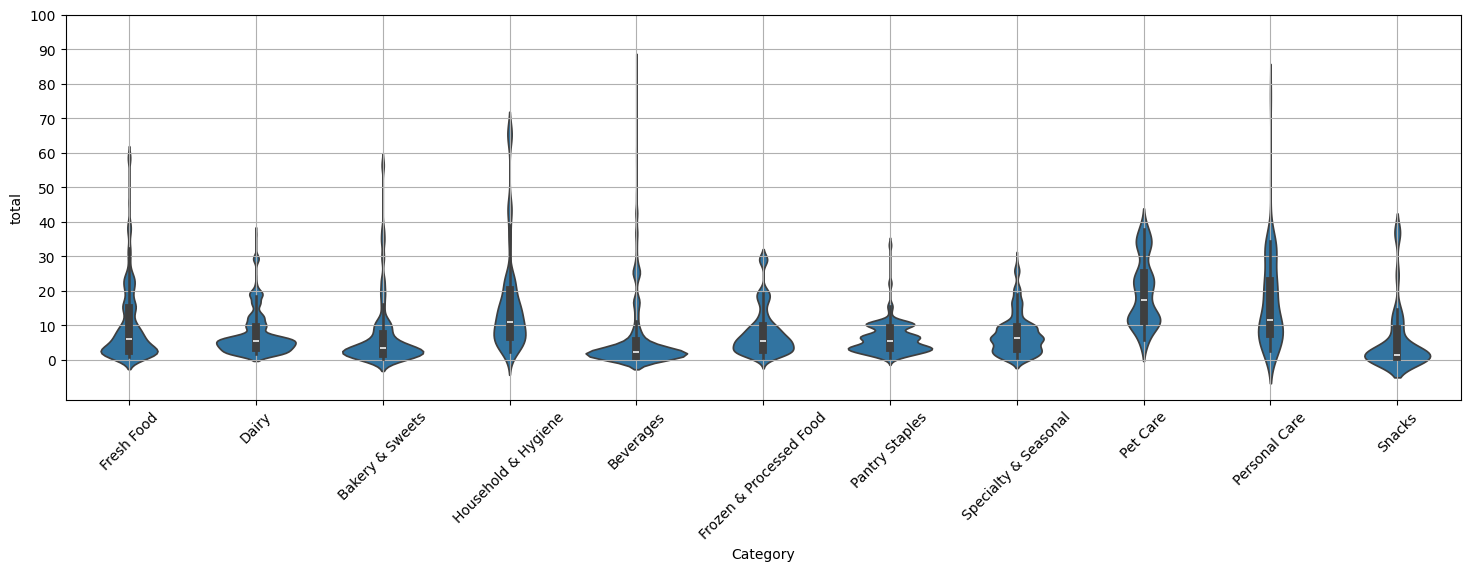

In [102]:
# Xem phân bố doanh thu dựa trên các nhóm dữ liệu khác nhau.

plt.figure(figsize=(18, 5))
sns.violinplot(data=df, x = "Category", y = "total")
plt.xticks(rotation=45)
plt.yticks(range(0, 101, 10))
plt.grid(True)

Dựa vào biểu đồ Candlestick Chart, ta thấy:
- Ba nhóm sản phẩm Household & Hygiene, Pet Care, Personal Care các giao dịch có giá trị nằm trong khoảng từ 10 đến 20 đô, cao nhất trong các nhóm, chứng tỏ giá tiền của các sản phầm trong nhóm này cao.
- Các nhóm còn lại có giá trị đơn hàng dưới 10 đô.
- Đặc biệt nhóm hàng giải khát (Beverages) có giá trị đơn hàng tập trung dưới 10 đô tuy nhiên vẫn có các đơn hàng giá trị rất cao, rất có thể ngoài các thức uống giải khát thông thường thì cửa hàng còn bán các mặt hàng rượu và thức uống giải khát cao cấp.

# Phân tích miêu tả dữ liệu

In [103]:
# Tạo hai feature mới để xem sự biến động của doanh thu qua các tháng, năm
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [104]:
pv_monthly_sales = df.pivot_table(index='month', columns='year', values='total', aggfunc='sum')

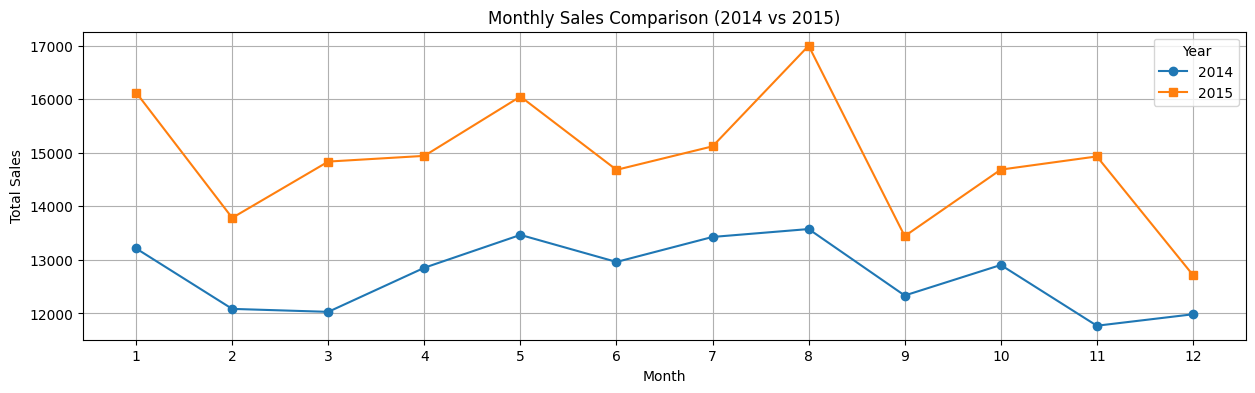

In [105]:
plt.figure(figsize=(15, 4))
plt.plot(pv_monthly_sales.index, pv_monthly_sales[2014], marker='o', linestyle='-', label='2014')
plt.plot(pv_monthly_sales.index, pv_monthly_sales[2015], marker='s', linestyle='-', label='2015')

plt.title("Monthly Sales Comparison (2014 vs 2015)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(pv_monthly_sales.index)
plt.legend(title="Year")
plt.grid(True)

Nhìn vào biểu đồ ta thấy, tình hình kinh doanh qua hai năm của cửa hàng có xu hướng tăng đáng kể.

Các tháng có kết quả kinh doanh tốt nhất tập trung vào tháng 1, tháng 4-5, tháng 7-8 và tháng 10.

In [106]:
# Tìm ra top 5 sản phẩm có danh thu tốt nhất
df_top_total = df.groupby(['productId', 'productName', 'Category'], as_index=False)['total'].sum()
df_top_total['rank'] = df_top_total['total'].rank(ascending=False, method='dense').astype(int)
df_top_total = df_top_total[df_top_total['rank'] <= 5].sort_values(by=['rank'])
df_top_total.head(9)

,productId,productName,Category,total,rank
7,8,beef,Fresh Food,19929.0,1
0,1,tropical fruit,Fresh Food,16333.2,2
113,114,napkins,Household & Hygiene,14584.2,3
44,45,curd,Dairy,9731.4,4
52,53,specialty chocolate,Bakery & Sweets,9155.6,5


In [107]:
# Tìm ra top 5 sản phẩm có số lượng sản phẩm được bán nhieuf nhất
df_top_items = df.groupby(['productId', 'productName', 'Category'], as_index=False)['items'].sum()
df_top_items['rank'] = df_top_items['items'].rank(ascending=False, method='dense').astype(int)
df_top_items = df_top_items[df_top_items['rank'] <= 5].sort_values(by=['rank'])
df_top_items.head(9)

,productId,productName,Category,items,rank
1,2,whole milk,Dairy,4968,1
3,4,other vegetables,Fresh Food,3743,2
4,5,rolls/buns,Bakery & Sweets,3332,3
37,38,soda,Beverages,2970,4
17,18,yogurt,Dairy,2650,5


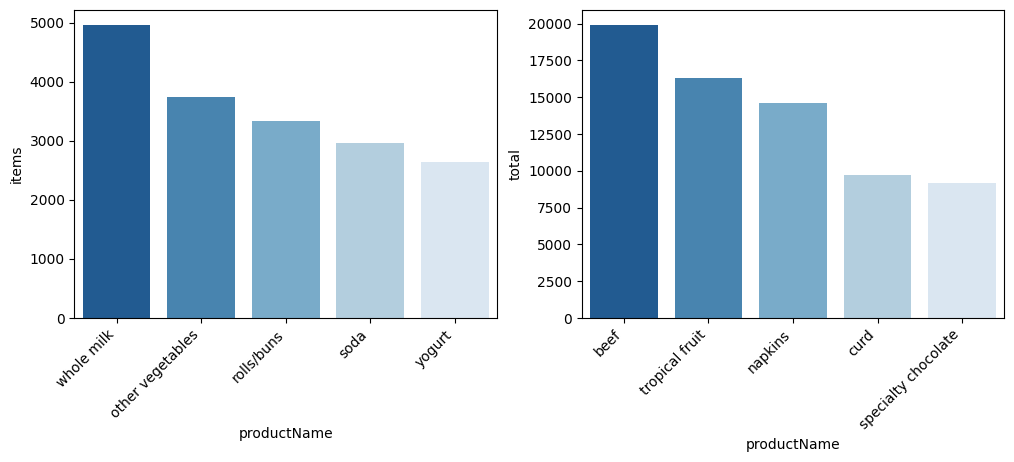

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(x=df_top_total['productName'], y=df_top_total['total'], palette="Blues_r", ax= axes[1])
sns.barplot(x=df_top_items['productName'], y=df_top_items['items'], palette="Blues_r", ax= axes[0])

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

Nhìn vào biểu đồ cột, ta có thể thấy:
- Sản phẩm Whole milk được bản nhiều sản phẩm nhất
- Sản phẩm beef đem lại doanh thu cao nhất cho cửa hàng

In [109]:
# Tạo bảng pivot để xem được top 3 sản phẩm qua mỗi tháng
Pv_top3_product = df.groupby(['year', 'month', 'productId', 'productName'], as_index=False)['total'].sum()
Pv_top3_product['rank'] = Pv_top3_product.groupby(['year','month'])['total'].rank(ascending=False, method='dense').astype(int)
Pv_top3_product = Pv_top3_product[Pv_top3_product['rank'] <= 3].sort_values(by=['year','month', 'rank'])

<Axes: xlabel='productName', ylabel='total'>

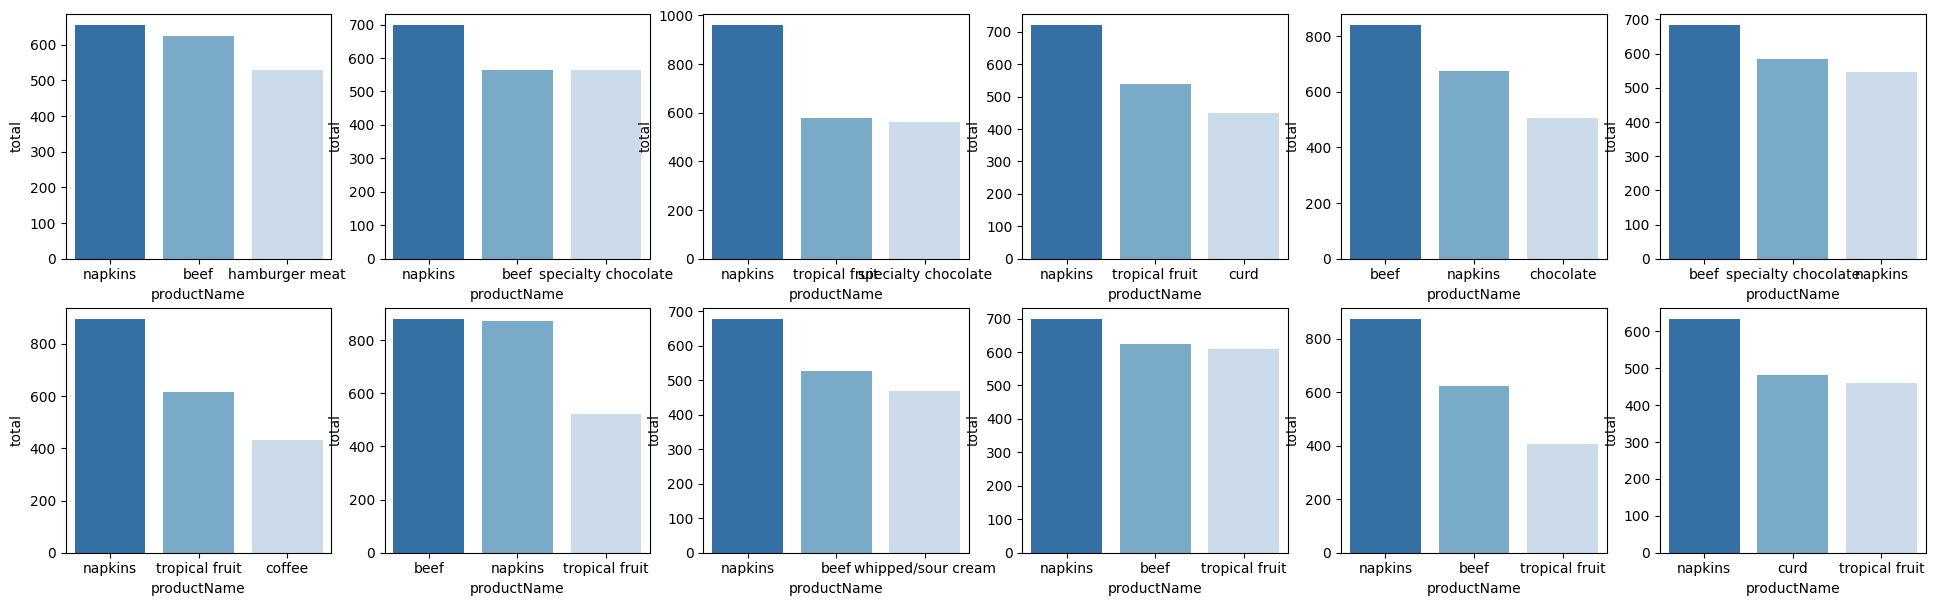

In [110]:
  fig, axes = plt.subplots(2, 6, figsize=(24, 7))

  sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==1) & (Pv_top3_product['year']==2014)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==1) & (Pv_top3_product['year']==2014)]['total'], palette="Blues_r", ax= axes[0,0])
  sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==2) & (Pv_top3_product['year']==2014)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==2) & (Pv_top3_product['year']==2014)]['total'], palette="Blues_r", ax= axes[0,1])
  sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==3) & (Pv_top3_product['year']==2014)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==3) & (Pv_top3_product['year']==2014)]['total'], palette="Blues_r", ax= axes[0,2])
  sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==4) & (Pv_top3_product['year']==2014)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==4) & (Pv_top3_product['year']==2014)]['total'], palette="Blues_r", ax= axes[0,3])
  sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==5) & (Pv_top3_product['year']==2014)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==5) & (Pv_top3_product['year']==2014)]['total'], palette="Blues_r", ax= axes[0,4])
  sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==6) & (Pv_top3_product['year']==2014)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==6) & (Pv_top3_product['year']==2014)]['total'], palette="Blues_r", ax= axes[0,5])
  sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==7) & (Pv_top3_product['year']==2014)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==7) & (Pv_top3_product['year']==2014)]['total'], palette="Blues_r", ax= axes[1,0])
  sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==8) & (Pv_top3_product['year']==2014)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==8) & (Pv_top3_product['year']==2014)]['total'], palette="Blues_r", ax= axes[1,1])
  sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==9) & (Pv_top3_product['year']==2014)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==9) & (Pv_top3_product['year']==2014)]['total'], palette="Blues_r", ax= axes[1,2])
  sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==10) & (Pv_top3_product['year']==2014)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==10) & (Pv_top3_product['year']==2014)]['total'], palette="Blues_r", ax= axes[1,3])
  sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==11) & (Pv_top3_product['year']==2014)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==11) & (Pv_top3_product['year']==2014)]['total'], palette="Blues_r", ax= axes[1,4])
  sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==12) & (Pv_top3_product['year']==2014)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==12) & (Pv_top3_product['year']==2014)]['total'], palette="Blues_r", ax= axes[1,5])


<Axes: xlabel='productName', ylabel='total'>

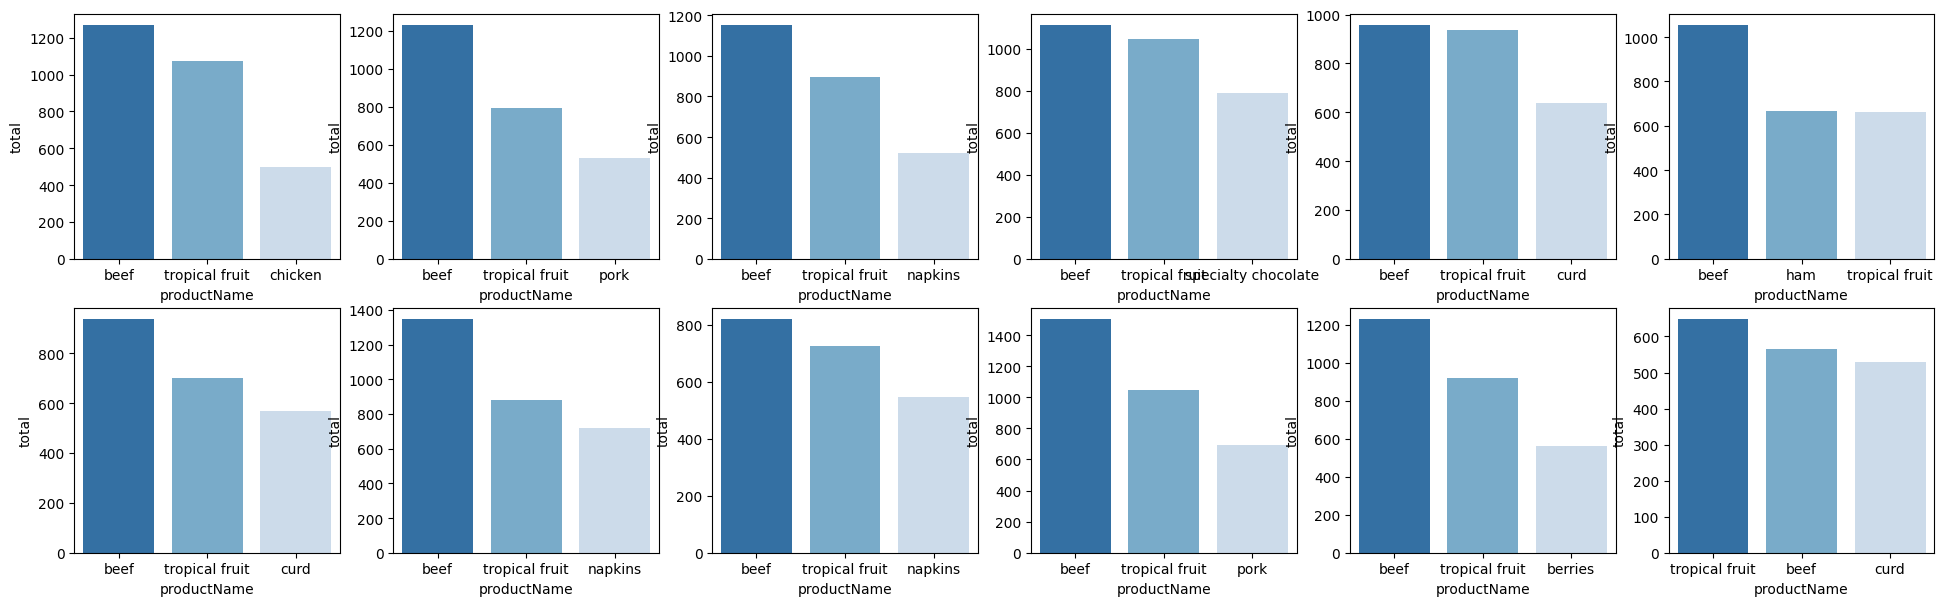

In [111]:
fig, axes = plt.subplots(2, 6, figsize=(24, 7))

sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==1) & (Pv_top3_product['year']==2015)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==1) & (Pv_top3_product['year']==2015)]['total'], palette="Blues_r", ax= axes[0,0])
sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==2) & (Pv_top3_product['year']==2015)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==2) & (Pv_top3_product['year']==2015)]['total'], palette="Blues_r", ax= axes[0,1])
sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==3) & (Pv_top3_product['year']==2015)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==3) & (Pv_top3_product['year']==2015)]['total'], palette="Blues_r", ax= axes[0,2])
sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==4) & (Pv_top3_product['year']==2015)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==4) & (Pv_top3_product['year']==2015)]['total'], palette="Blues_r", ax= axes[0,3])
sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==5) & (Pv_top3_product['year']==2015)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==5) & (Pv_top3_product['year']==2015)]['total'], palette="Blues_r", ax= axes[0,4])
sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==6) & (Pv_top3_product['year']==2015)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==6) & (Pv_top3_product['year']==2015)]['total'], palette="Blues_r", ax= axes[0,5])
sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==7) & (Pv_top3_product['year']==2015)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==7) & (Pv_top3_product['year']==2015)]['total'], palette="Blues_r", ax= axes[1,0])
sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==8) & (Pv_top3_product['year']==2015)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==8) & (Pv_top3_product['year']==2015)]['total'], palette="Blues_r", ax= axes[1,1])
sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==9) & (Pv_top3_product['year']==2015)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==9) & (Pv_top3_product['year']==2015)]['total'], palette="Blues_r", ax= axes[1,2])
sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==10) & (Pv_top3_product['year']==2015)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==10) & (Pv_top3_product['year']==2015)]['total'], palette="Blues_r", ax= axes[1,3])
sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==11) & (Pv_top3_product['year']==2015)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==11) & (Pv_top3_product['year']==2015)]['total'], palette="Blues_r", ax= axes[1,4])
sns.barplot(x=Pv_top3_product[(Pv_top3_product['month']==12) & (Pv_top3_product['year']==2015)]['productName'], y=Pv_top3_product[(Pv_top3_product['month']==12) & (Pv_top3_product['year']==2015)]['total'], palette="Blues_r", ax= axes[1,5])

Sau khi xem qua top 3 sản phẩm có doanh thu cao nhất ta có một số kết luận:
- Năm 2014 đa phần sản phẩm đem lại lợi nhuận cao nhất là sản phẩm napskins, đứng thứ hai là beef
- Năm 2024 sản phẩm beef và tropical fruit đem lại doanh thu cao nhất dường như ở tất cả các tháng.

Ta có thể tạm kết luận:
- Key product của cửa hàng là beef, và doanh thu chính của cửa hàng đến từ nhóm sản phẩm Fresh Food.
- Có thể có một số thay đổi trong chiến lược kinh doanh, cách trưng bày hàng hóa trong năm 2025 cửa hàng tập trung và các sản phẩm Fresh Food đã giúp doanh số năm 2025 tăng mạnh so với năm 2024.

# Bước 4: Modeling & Evaluation

## Tạo thêm các Feature mới RFM để xây dựng mô hình phân tích khách hàng
> Recency (R – Gần đây): Lần mua hàng gần nhất là khi nào?

> Frequency (F – Tần suất): Khách hàng mua hàng bao nhiêu lần?

> Monetary (M – Giá trị tiền tệ): Tổng số tiền khách hàng đã chi tiêu là bao nhiêu?

- Phân khúc khách hàng: Xác định nhóm khách hàng trung thành, khách hàng tiềm năng, khách hàng đã rời bỏ…
- Tối ưu chiến dịch marketing: Nhắm mục tiêu hiệu quả hơn, gửi ưu đãi phù hợp với từng nhóm.
- Cải thiện doanh thu: Tập trung vào khách hàng có giá trị cao để tăng lợi nhuận.
- Dự đoán hành vi khách hàng: Biết khách hàng nào có khả năng mua lại hoặc rời bỏ thương hiệu.

In [112]:
# Tạo thêm biến orderId
df = df.reset_index(drop=True)  # Reset index về 0,1,2,...
df['orderId'] = df.index + 1

In [113]:
# Tạo thêm 3 biến Recency, Frequency, Monetary
max_date = df['Date'].max().date()

Recency = lambda x : (max_date - x.max().date()).days
Frequency  = lambda x: len(x.unique())
Monetary = lambda x : round(sum(x), 2)

df_RFM = df.groupby('Member_number').agg({'Date': Recency,
                                        'orderId': Frequency,
                                        'total': Monetary })

df_RFM.head()

,Date,orderId,total
Member_number,,,
1000,35,13,53.80
1001,242,12,100.00
1002,122,8,70.30
1003,323,8,60.65
1004,28,21,204.96


In [114]:
# Thực hiện đổi tên các cột và sắp xếp giảm dần feature Monetary
df_RFM.columns = ['Recency', 'Frequency', 'Monetary']

df_RFM = df_RFM.sort_values('Monetary', ascending=False)
df_RFM.head(5)

,Recency,Frequency,Monetary
Member_number,,,
2193,91,27,361.45
1793,26,25,345.10
3289,4,29,334.15
2433,3,30,316.81
2743,142,17,312.46


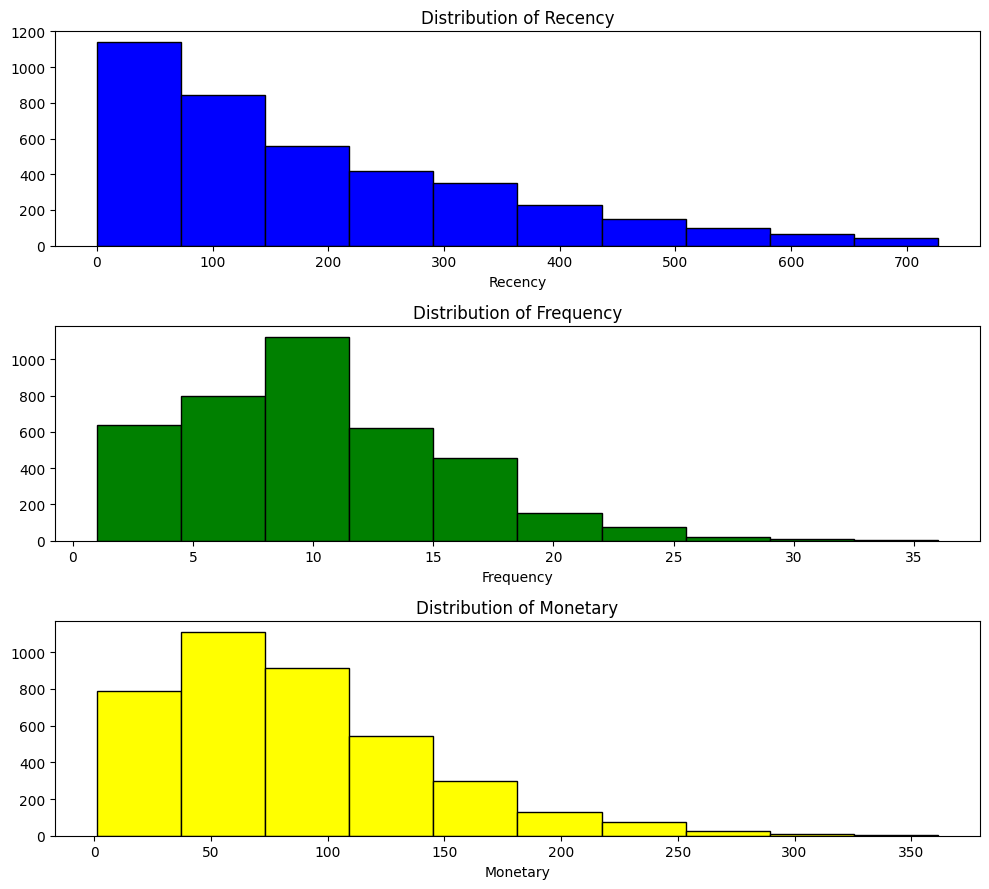

In [115]:
plt.figure(figsize=(10, 9))
# Vẽ biểu đồ historam của 'Recency'
plt.subplot(3, 1, 1)
plt.hist(df_RFM['Recency'], bins=10, edgecolor='black', color = 'blue')
plt.title('Distribution of Recency')
plt.xlabel('Recency')

# Vẽ biểu đồ historam của 'Frequency'
plt.subplot(3, 1, 2)
plt.hist(df_RFM['Frequency'], bins=10, edgecolor='black', color= 'green' )
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')

# Vẽ biểu đồ historam của 'Monetary'
plt.subplot(3, 1, 3)
plt.hist(df_RFM['Monetary'], bins=10, edgecolor='black', color= 'yellow')
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

## Nhìn vào biểu đồ ta thấy:

**- Nhận xét biểu đồ Recency (R)**
+ Phân phối lệch phải (skewed right) → Phần lớn khách hàng có Recency thấp (mua hàng gần đây).
+ Số lượng khách hàng giảm dần khi Recency tăng, tức là có ít khách hàng lâu rồi chưa mua lại.

Ý nghĩa:
+ Cửa hàng có nhiều khách hàng trung thành vì nhiều người vẫn đang mua hàng gần đây.
+ Nhưng vẫn có một số khách hàng lâu không quay lại → Cần chiến dịch tái kích hoạt.

**- Nhận xét biểu đồ Frequency (F)**
+ Phân phối hơi cân đối nhưng vẫn lệch phải nhẹ.
+ Đa số khách hàng mua hàng 5 - 15 lần, nhưng cũng có nhóm chỉ mua 1-2 lần.

Ý nghĩa:
+ Một số khách hàng có tần suất mua cao → Cần chăm sóc nhóm này tốt hơn.
+ Nhưng vẫn có nhóm mua ít → Cần chiến lược thúc đẩy mua nhiều hơn (khuyến mãi, gợi ý sản phẩm).

**- Nhận xét biểu đồ Monetary (M)**
+ Phân phối lệch phải mạnh, có nghĩa là đa số khách hàng chi tiêu thấp, nhưng vẫn có một số khách hàng chi tiêu cao.
+ Phần lớn khách hàng chi tiêu từ 0 - 100, nhưng có một số chi tiêu hơn 200.

Ý nghĩa:
+ Có một nhóm nhỏ khách hàng giá trị cao (High-Value Customers) → Cần ưu đãi đặc biệt để giữ chân.
+ Phần lớn khách hàng chi tiêu thấp → Có thể cần chiến lược Upsell / Bundle (bán kèm combo, ưu đãi khi mua nhiều hơn).

# Thực hiện phân nhóm khách hàng qua RFM sử dụng các tập luật tự đề xuất

In [116]:
# Thực hiện tạo label cho Recency, Frequency, Monetary
r_labels = range(4, 0, -1) # số ngày tính từ lần cuối mua hàng lớn thì gán nhãn nhỏ, ngược lại thì nhãn lớn
f_labels = range(1, 5)
m_labels = range(1, 5)

In [117]:
# Gán các nhãn này cho 4 nhóm percentile bằng nhau
r_groups = pd.qcut(df_RFM['Recency'].rank(method='first'), q=4, labels=r_labels)

f_groups = pd.qcut(df_RFM['Frequency'].rank(method='first'), q=4, labels=f_labels)

m_groups = pd.qcut(df_RFM['Monetary'].rank(method='first'), q=4, labels=m_labels)

In [118]:
# Tạo các feature mới R, F, M
df_RFM = df_RFM.assign(R = r_groups.values, F = f_groups.values,  M = m_groups.values)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M
Member_number,,,,,,
2193,91,27,361.45,3,4,4
1793,26,25,345.10,4,4,4
3289,4,29,334.15,4,4,4
2433,3,30,316.81,4,4,4
2743,142,17,312.46,2,4,4


In [119]:
# Ta thực hiện kết hợp 3 cột R F M để tạo ra RFM Segment
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
df_RFM['RFM_Segment'] = df_RFM.apply(join_rfm, axis=1)

In [120]:
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment
Member_number,,,,,,,
2193,91,27,361.45,3,4,4,344
1793,26,25,345.10,4,4,4,444
3289,4,29,334.15,4,4,4,444
2433,3,30,316.81,4,4,4,444
2743,142,17,312.46,2,4,4,244


In [121]:
# Ta kiểm tra có bao nhiêu unique segment được tạo ra
rfm_count_unique = df_RFM.groupby('RFM_Segment')['RFM_Segment'].nunique()
print(rfm_count_unique.sum())

60


In [122]:
# Tính toán điểm RFM bằng cách cộng số ở ba feature R F M
df_RFM['RFM_Score'] = df_RFM[['R','F','M']].sum(axis=1)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
Member_number,,,,,,,,
2193,91,27,361.45,3,4,4,344,11
1793,26,25,345.10,4,4,4,444,12
3289,4,29,334.15,4,4,4,444,12
2433,3,30,316.81,4,4,4,444,12
2743,142,17,312.46,2,4,4,244,10


In [123]:
def rfm_level(df):
    if df['RFM_Score'] == 12: # Khách hàng có số điểm tối đa là khách hàng VIP
        return 'VIPS'
    elif df['R'] == 4 and df['F'] == 1: # Khách hàng có ngày mua hàng gần nhất, tổng số giao dịch ít
        return 'NEW'
    elif df['R'] == 4 and df['F'] == 3 and df['M'] == 3: # Khách hàng thực hiện giao dịch gần đây, có phát sinh nhiều giao dịch, tổng giá trị giao dịch cao
        return 'LOYAL'
    elif df['R'] >= 3 and df['F'] == 4 and df['M'] == 4: # Khách hàng thực hiện giao dịch gần đây, có phát sinh nhiều giao dịch
        return 'ACTIVE'
    elif df['R'] == 1 and (df['R'] > 1 or df['M'] > 1): # Khách hàng đã lâu không mua hàng và tổng số tiền mua hàng, tổng số giao dịch trung bình
        return 'DORMANT'
    elif df['R'] == 1 and df['R'] == 1 and df['M'] == 1: # Khách hàng đã lâu không mua hàng và tổng số tiền mua hàng, tổng số giao dịch cũng rất thấp
        return 'CHURN'
    elif df['R'] == 2:
        return 'INACTIVE'
    else:
        return 'REGULARS'

In [124]:
# Tạo ra cột chứa RFM level
df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis=1)

In [125]:
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
Member_number,,,,,,,,,
2193,91,27,361.45,3,4,4,344,11,ACTIVE
1793,26,25,345.10,4,4,4,444,12,VIPS
3289,4,29,334.15,4,4,4,444,12,VIPS
2433,3,30,316.81,4,4,4,444,12,VIPS
2743,142,17,312.46,2,4,4,244,10,INACTIVE


In [126]:
# Print the header with top 5 rows
df_RFM[::500]

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
Member_number,,,,,,,,,
2193,91,27,361.45,3,4,4,344,11,ACTIVE
4759,313,11,148.85,1,3,4,134,8,DORMANT
3204,236,11,113.62,2,3,3,233,8,INACTIVE
3315,41,13,90.50,4,4,3,443,11,REGULARS
3644,89,7,73.00,3,2,2,322,7,REGULARS
4898,157,6,57.20,2,1,2,212,5,INACTIVE
1104,64,10,40.25,3,3,1,331,7,REGULARS
3383,412,6,23.10,1,2,1,121,4,CHURN


In [127]:
df_RFM['RFM_Level'].value_counts()

,count
RFM_Level,
REGULARS,1235
INACTIVE,974
DORMANT,515
CHURN,460
VIPS,288
ACTIVE,209
LOYAL,114
NEW,103


In [128]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg = df_RFM.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg['Percent'] = round((rfm_agg['Count']/rfm_agg.Count.sum())*100, 2)

rfm_agg = rfm_agg.reset_index()

In [129]:
rfm_agg

,RFM_Level,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,ACTIVE,98.0,18.0,171.0,209,5.36
1,CHURN,458.0,4.0,23.0,460,11.80
2,DORMANT,385.0,9.0,83.0,515,13.21
3,INACTIVE,205.0,10.0,82.0,974,24.99
4,LOYAL,28.0,11.0,95.0,114,2.92
5,NEW,26.0,4.0,44.0,103,2.64
6,REGULARS,72.0,10.0,78.0,1235,31.68
7,VIPS,29.0,18.0,176.0,288,7.39


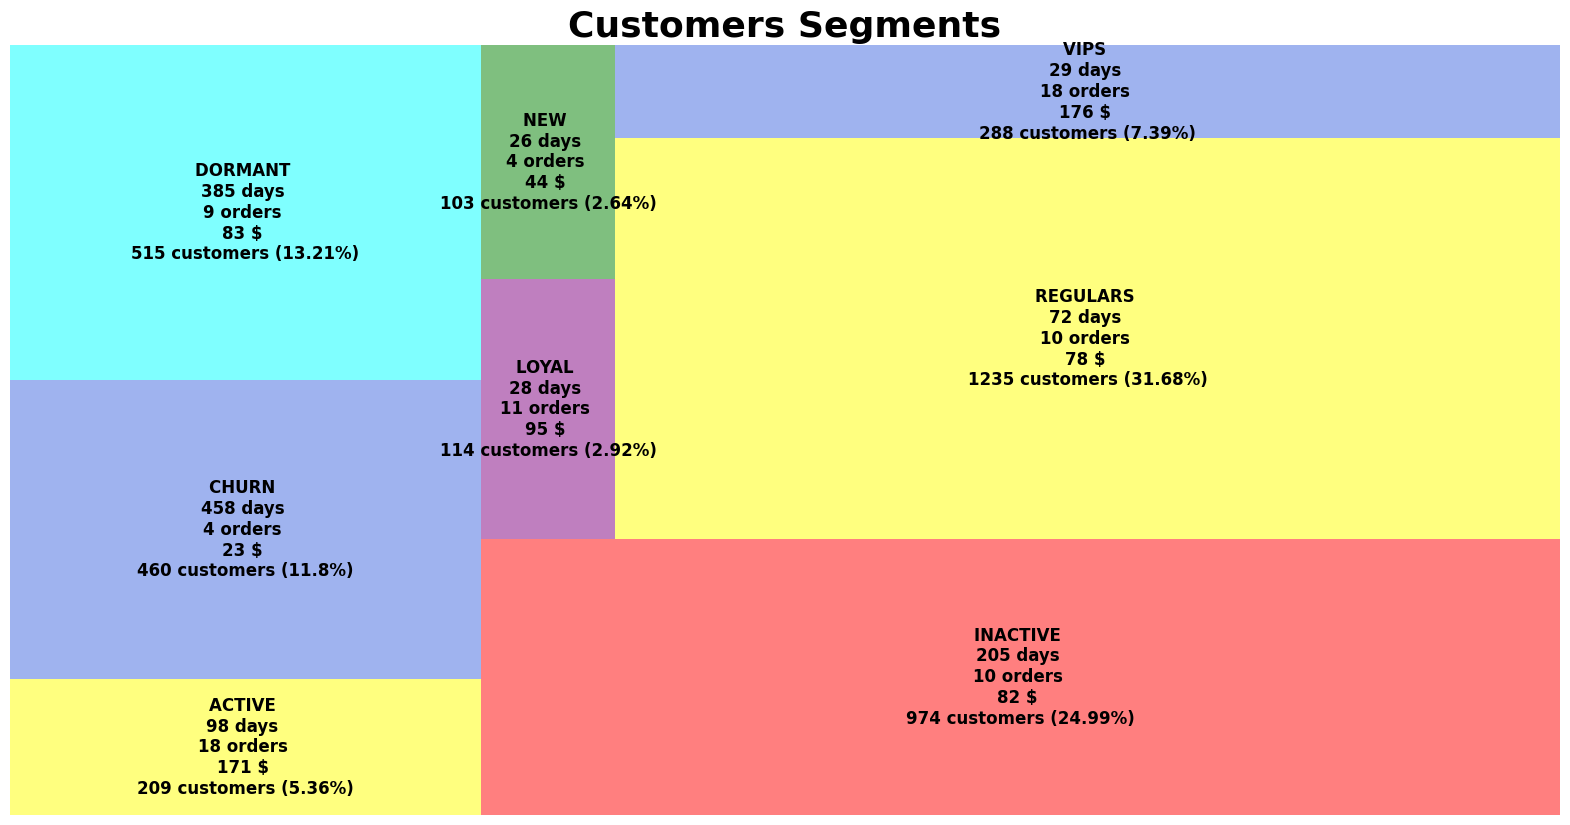

In [130]:
# Trực quan hoá bằng biểu đồ
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 10)

colors_dict = {'VIPS':'yellow','ACTIVE':'royalblue', 'NEW':'cyan',
               'CHURN':'red', 'INACTIVE':'purple', 'REGULARS':'green'}

squarify.plot(sizes=rfm_agg['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg.iloc[i])
                      for i in range(0, len(rfm_agg))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('RFM Segments.png')
plt.show()

In [131]:
import plotly.express as px

fig = px.scatter(rfm_agg, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="RFM_Level",
           hover_name="RFM_Level", size_max=100)
fig.show()

# Thực hiện phân nhóm khách hàng qua RFM sử dụng KMeans

In [132]:
df_now = df_RFM[['Recency','Frequency','Monetary']]

In [133]:
df_now.head()

,Recency,Frequency,Monetary
Member_number,,,
2193,91,27,361.45
1793,26,25,345.10
3289,4,29,334.15
2433,3,30,316.81
2743,142,17,312.46


In [134]:
df_now.tail()

,Recency,Frequency,Monetary
Member_number,,,
1560,593,2,1.9
1221,410,2,1.7
4029,429,1,1.6
1250,448,2,1.3
4565,0,1,1.1


In [135]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_now)
    sse[k] = kmeans.inertia_

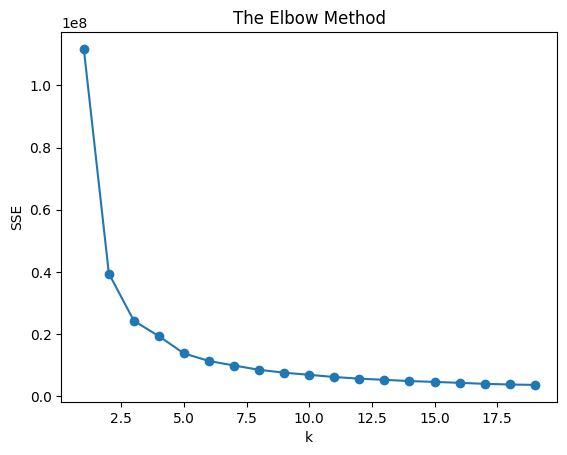

In [136]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')

plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.show()

In [137]:
# Build model with k=5
model = KMeans(n_clusters=5, random_state=42)
model.fit(df_now)
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

model.labels_.shape

(3898,)

In [138]:
from google.colab import files
files.download('kmeans_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

chọn giá trị
𝑘 = 5
mà từ đó WCSS giảm dần nhưng không còn giảm đáng kể nữa.
dữ liệu cần được chia thành 5 nhóm khách hàng, 5 loại hành vi, hoặc 5 phân khúc sản phẩm

In [139]:
df_now["Cluster"] = model.labels_
df_now.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0        187.64      9.50    78.25  1050
1         54.47      9.59    71.32  1189
2         63.46     17.08   175.44   602
3        551.46      4.57    37.85   327
4        344.32      7.35    62.98   730

In [140]:
rfm_agg2 = df_now.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg2['Percent'] = round((rfm_agg2['Count']/rfm_agg2.Count.sum())*100, 2)

rfm_agg2 = rfm_agg2.reset_index()

rfm_agg2['Cluster'] = 'Cluster '+ rfm_agg2['Cluster'].astype('str')

rfm_agg2

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,188.0,9.0,78.0,1050,26.94
1,Cluster 1,54.0,10.0,71.0,1189,30.50
2,Cluster 2,63.0,17.0,175.0,602,15.44
3,Cluster 3,551.0,5.0,38.0,327,8.39
4,Cluster 4,344.0,7.0,63.0,730,18.73


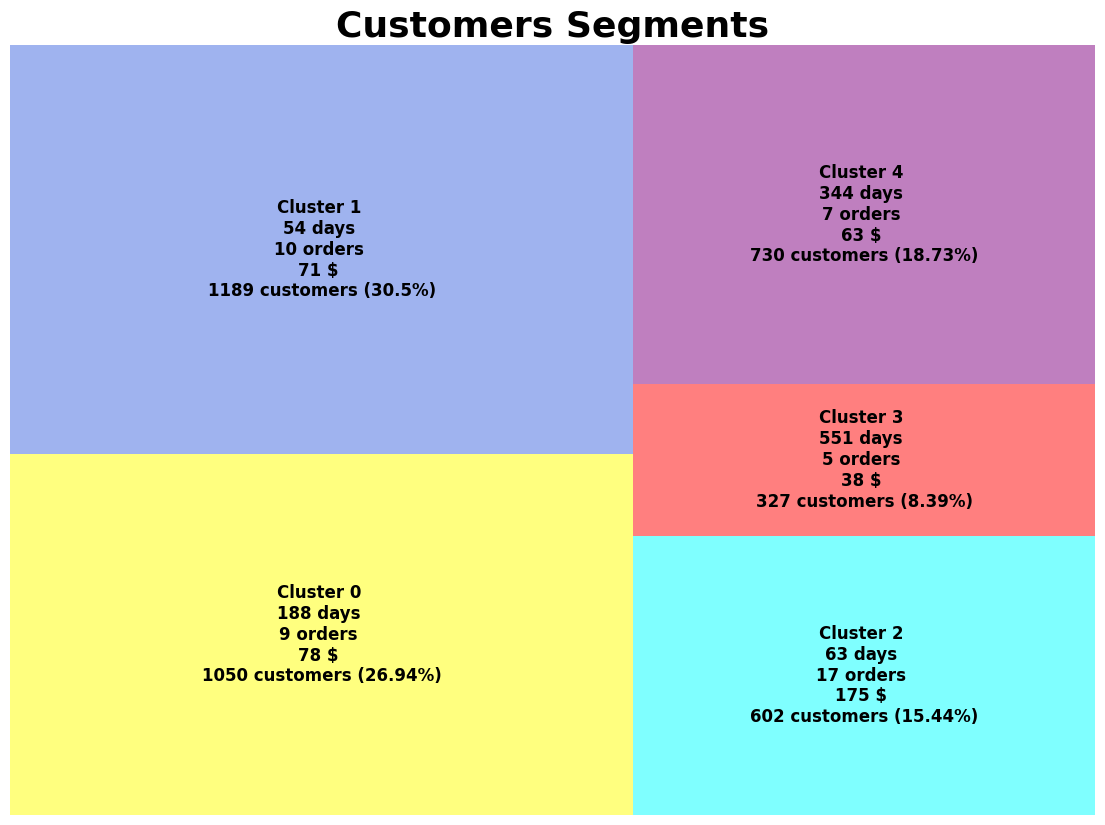

In [141]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue', 'Cluster2':'cyan',
               'Cluster3':'red', 'Cluster4':'purple', 'Cluster5':'green', 'Cluster6':'gold'}

squarify.plot(sizes=rfm_agg2['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg2.iloc[i])
                      for i in range(0, len(rfm_agg2))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('Unsupervised Segments.png')
plt.show()

In [142]:
import plotly.express as px

fig = px.scatter(rfm_agg2, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster",
           hover_name="Cluster", size_max=100)
fig.show()

Dữ liệu đã được phân thành 5 nhóm khách hàng dựa trên 3 tiêu chí:

Recency (R): Khoảng thời gian kể từ lần mua hàng gần nhất.

Frequency (F): Tần suất mua hàng.

Monetary (M): Tổng số tiền chi tiêu

Cluster 0: Khách hàng trung bình
Nhận xét: Nhóm khách hàng ổn định nhưng chưa trung thành. Cần có chương trình khuyến mãi để kích thích họ mua hàng thường xuyên hơn.

Cluster 1: Khách hàng VIP (Loyal Customers)
Nhận xét: Đây là nhóm khách hàng trung thành, đóng góp doanh thu lớn. Nên có chương trình ưu đãi đặc biệt, giảm giá, hay chính sách chăm sóc khách hàng VIP để giữ chân họ.

Cluster 2: Khách hàng mới
Nhận xét: Đây là nhóm khách hàng tiềm năng nhưng chưa trung thành. Cần gửi email chào mừng, giảm giá đơn hàng tiếp theo để thu hút họ quay lại.

 Cluster 3: Khách hàng không thường xuyên (Hibernating Customers)
  Nhận xét: Đây là nhóm khách hàng đang rời bỏ. Cần có chiến dịch re-marketing như email nhắc nhở, giảm giá khuyến mãi để kéo họ quay lại.

   Cluster 4: Khách hàng tiềm năng nhưng ít mua
   Nhận xét: Đây là nhóm khách hàng có thể phát triển, nếu có chương trình khuyến mãi phù hợp họ có thể trở thành khách hàng trung thành.
   

# Thực hiện phân nhóm khách hàng qua RFM sử dụng GMM

In [143]:
import squarify
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(df_now)

df_now['Cluster'] = gmm.predict(df_now)

rfm_agg2 = df_now.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)


In [144]:
rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count']

In [145]:
# Tính tỷ lệ phần trăm cho từng cluster
rfm_agg2['Percent'] = round((rfm_agg2['Count'] / rfm_agg2.Count.sum()) * 100, 2)
rfm_agg2 = rfm_agg2.reset_index()
# Thêm tên cluster
rfm_agg2['Cluster'] = 'Cluster ' + rfm_agg2['Cluster'].astype('str')
print(rfm_agg2)

     Cluster  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent
0  Cluster 0        188.0            9.0          78.0   1050    26.94
1  Cluster 1         54.0           10.0          71.0   1189    30.50
2  Cluster 2         63.0           17.0         175.0    602    15.44
3  Cluster 3        344.0            7.0          63.0    730    18.73
4  Cluster 4        551.0            5.0          38.0    327     8.39


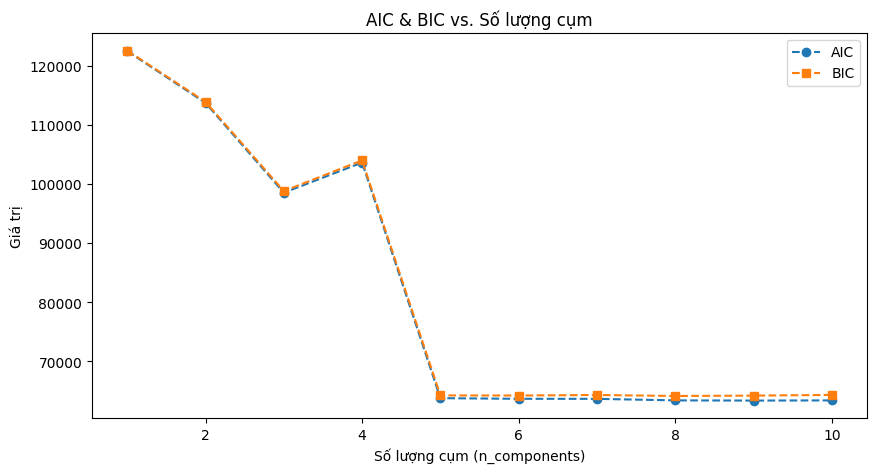

In [146]:
n_components = range(1, 11)  # Số cụm từ 1 đến 10
aic_values = []
bic_values = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df_now)
    aic_values.append(gmm.aic(df_now))
    bic_values.append(gmm.bic(df_now))

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
plt.plot(n_components, aic_values, label="AIC", marker='o', linestyle='dashed')
plt.plot(n_components, bic_values, label="BIC", marker='s', linestyle='dashed')
plt.xlabel("Số lượng cụm (n_components)")
plt.ylabel("Giá trị")
plt.title("AIC & BIC vs. Số lượng cụm")
plt.legend()
plt.show()

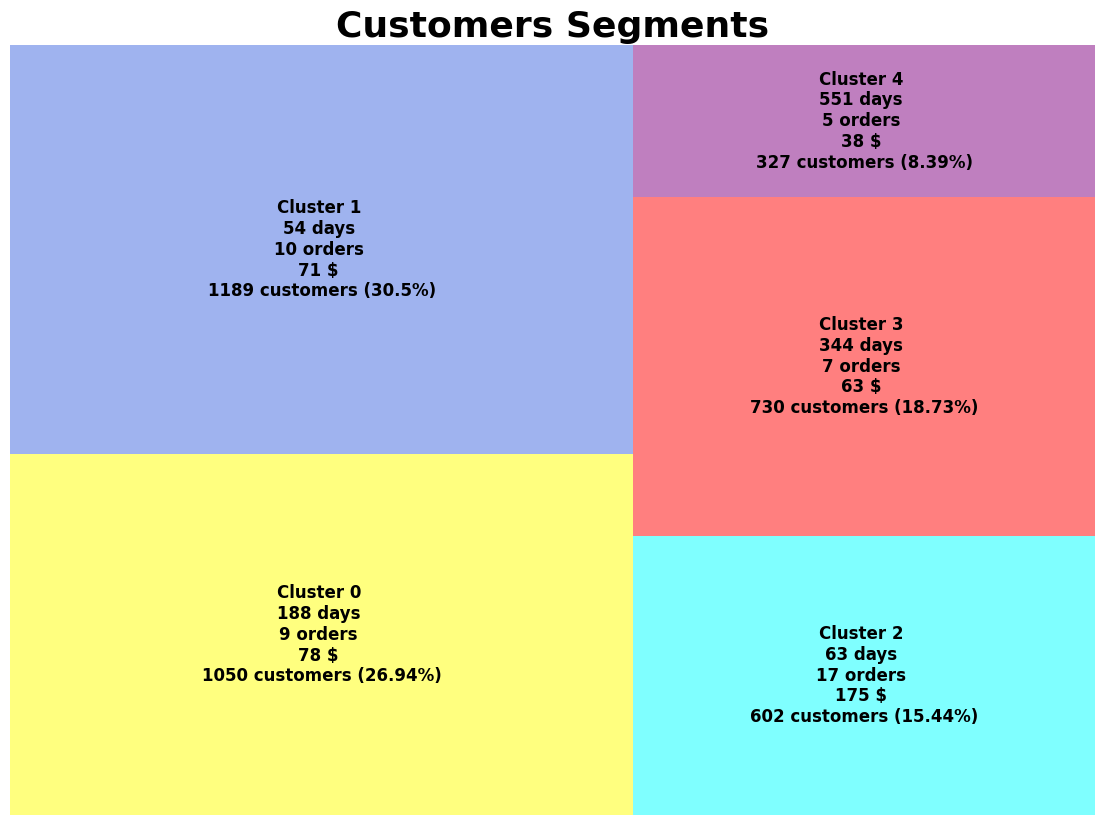

In [147]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Cluster0': 'yellow', 'Cluster1': 'royalblue', 'Cluster2': 'cyan',
                'Cluster3': 'red', 'Cluster4': 'purple', 'Cluster5': 'green', 'Cluster6': 'gold'}

squarify.plot(sizes=rfm_agg2['Count'],
              text_kwargs={'fontsize': 12, 'weight': 'bold', 'fontname': "sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg2.iloc[i])
                     for i in range(0, len(rfm_agg2))], alpha=0.5)

plt.title("Customers Segments", fontsize=26, fontweight="bold")
plt.axis('off')
plt.show()

In [148]:
import plotly.express as px

fig = px.scatter(rfm_agg2, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster",
                 hover_name="Cluster", size_max=100)
fig.show()

In [149]:
# Thống kê cơ bản cho từng cluster
cluster_stats = df_now.groupby('Cluster').agg({
    'Recency': ['mean', 'std', 'min', 'max'],
    'Frequency': ['mean', 'std', 'min', 'max'],
    'Monetary': ['mean', 'std', 'min', 'max']
}).round(2)

print(cluster_stats)

        Recency                  Frequency               Monetary         \
           mean    std  min  max      mean   std min max     mean    std   
Cluster                                                                    
0        187.64  41.33  121  273      9.50  4.34   1  27    78.25  42.55   
1         54.47  34.53    0  123      9.59  3.80   1  25    71.32  30.11   
2         63.46  44.25    0  239     17.08  4.70   6  36   175.44  42.96   
3        344.32  49.90  261  452      7.35  3.82   1  26    62.98  42.26   
4        551.46  75.96  445  727      4.57  2.49   2  15    37.85  29.04   

                         
            min     max  
Cluster                  
0          2.40  248.11  
1          1.10  125.60  
2        119.65  361.45  
3          1.60  305.72  
4          1.30  165.35  


Cluster 0: Khách hàng có hoạt động gần đây và chi tiêu khá cao, nhưng giao dịch không thường xuyên.

Cluster 1: Khách hàng ít hoạt động gần đây và chi tiêu thấp hơn, nhưng tần suất giao dịch khá ổn định.

Cluster 2: Khách hàng giao dịch nhiều với mức chi tiêu khá cao, nhưng hoạt động không đều đặn.

Cluster 3: Khách hàng có hoạt động gần đây nhưng ít giao dịch, mức chi tiêu thấp.

Cluster 4: Khách hàng ít hoạt động và giao dịch, mức chi tiêu thấp hơn.

In [150]:
rfm_agg2 = df_now.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
}).round(2)

rfm_agg2['Cluster'] = rfm_agg2.index.astype(str)

for cluster in rfm_agg2.index:
    recency = rfm_agg2.loc[cluster, 'Recency']
    frequency = rfm_agg2.loc[cluster, 'Frequency']
    monetary = rfm_agg2.loc[cluster, 'Monetary']

    print(f"Cluster {cluster}:")
    print(f" - Recency Mean: {recency}")
    print(f" - Frequency Mean: {frequency}")
    print(f" - Monetary Mean: {monetary}")

    # Chiến lược marketing cho từng cluster
    if cluster == '0':  # Cluster 0
        print("=> Chiến lược Marketing: Khuyến mãi để khuyến khích mua lại.")
        print("   - Chương trình khách hàng thân thiết, giảm giá cho khách hàng thường xuyên.")
        print("   - Email marketing với các ưu đãi đặc biệt.")

    elif cluster == '1':  # Cluster 1
        print("=> Chiến lược Marketing: Chương trình tái kích hoạt khách hàng.")
        print("   - Khuyến mãi giảm giá hoặc ưu đãi đặc biệt cho khách hàng ít mua.")
        print("   - Tạo chương trình quà tặng hoặc mã giảm giá cho lần mua tiếp theo.")

    elif cluster == '2':  # Cluster 2
        print("=> Chiến lược Marketing: Chăm sóc khách hàng VIP.")
        print("   - Tạo các chương trình ưu đãi VIP cho khách hàng với mức chi tiêu cao.")
        print("   - Gửi email cá nhân hóa và khuyến khích họ mua nhiều hơn.")

    elif cluster == '3':  # Cluster 3
        print("=> Chiến lược Marketing: Khuyến khích hành động ngay.")
        print("   - Cung cấp các mã giảm giá hoặc ưu đãi đặc biệt cho khách hàng ít giao dịch.")
        print("   - Nhắc nhở họ về các sản phẩm đã xem hoặc các sản phẩm có thể phù hợp.")

    elif cluster == '4':  # Cluster 4
        print("=> Chiến lược Marketing: Khuyến mãi tái kích hoạt mạnh mẽ.")
        print("   - Sử dụng các chiến lược khuyến mãi mạnh mẽ để tái kích hoạt khách hàng.")
        print("   - Tặng quà tặng miễn phí hoặc giảm giá để thu hút họ quay lại.")

    print("\n" + "-"*50 + "\n")



Cluster 0:
 - Recency Mean: 187.64
 - Frequency Mean: 9.5
 - Monetary Mean: 78.25

--------------------------------------------------

Cluster 1:
 - Recency Mean: 54.47
 - Frequency Mean: 9.59
 - Monetary Mean: 71.32

--------------------------------------------------

Cluster 2:
 - Recency Mean: 63.46
 - Frequency Mean: 17.08
 - Monetary Mean: 175.44

--------------------------------------------------

Cluster 3:
 - Recency Mean: 344.32
 - Frequency Mean: 7.35
 - Monetary Mean: 62.98

--------------------------------------------------

Cluster 4:
 - Recency Mean: 551.46
 - Frequency Mean: 4.57
 - Monetary Mean: 37.85

--------------------------------------------------



Cluster 0:
 - Recency Mean: 187.64
 - Frequency Mean: 9.5
 - Monetary Mean: 78.25
--------------------------------------------------
=> Chiến lược Marketing: Khuyến mãi để khuyến khích mua lại.
   - Chương trình khách hàng thân thiết, giảm giá cho khách hàng thường xuyên.
   - Email marketing với các ưu đãi đặc biệt.

==================================================

Cluster 1:
 - Recency Mean: 54.47
 - Frequency Mean: 9.59
 - Monetary Mean: 71.32
--------------------------------------------------
=> Chiến lược Marketing: Chương trình tái kích hoạt khách hàng.
   - Khuyến mãi giảm giá hoặc ưu đãi đặc biệt cho khách hàng ít mua.
   - Tạo chương trình quà tặng hoặc mã giảm giá cho lần mua tiếp theo.

==================================================

Cluster 2:
 - Recency Mean: 63.46
 - Frequency Mean: 17.08
 - Monetary Mean: 175.44
--------------------------------------------------
=> Chiến lược Marketing: Chăm sóc khách hàng VIP.
   - Tạo các chương trình ưu đãi VIP cho khách hàng với mức chi tiêu cao.
   - Gửi email cá nhân hóa và khuyến khích họ mua nhiều hơn.

==================================================

Cluster 3:
 - Recency Mean: 344.32
 - Frequency Mean: 7.35
 - Monetary Mean: 62.98
--------------------------------------------------
=> Chiến lược Marketing: Khuyến khích hành động ngay.
   - Cung cấp các mã giảm giá hoặc ưu đãi đặc biệt cho khách hàng ít giao dịch.
   - Nhắc nhở họ về các sản phẩm đã xem hoặc các sản phẩm có thể phù hợp.

==================================================

Cluster 4:
 - Recency Mean: 551.46
 - Frequency Mean: 4.57
 - Monetary Mean: 37.85
--------------------------------------------------
=> Chiến lược Marketing: Khuyến mãi tái kích hoạt mạnh mẽ.
   - Sử dụng các chiến lược khuyến mãi mạnh mẽ để tái kích hoạt khách hàng.
   - Tặng quà tặng miễn phí hoặc giảm giá để thu hút họ quay lại.

==================================================


Kết luận:
KMeans là lựa chọn tốt khi dữ liệu của bạn có cấu trúc đơn giản, các cụm có hình cầu và không có độ phân tán quá lớn.

GMM phù hợp hơn với dữ liệu phức tạp, nơi các cụm có thể có hình dạng khác nhau và phân phối không đồng nhất. Mặc dù chậm hơn KMeans, GMM có thể giúp phát hiện các mối quan hệ phức tạp trong dữ liệu.

# Kết luận:
Dữ liệu này phù hợp với K-Means hơn vì:
- Các cụm có sự phân tách khá rõ ràng (dựa vào Recency, Frequency, Monetary).
- K-Means chạy nhanh hơn, đặc biệt khi bạn đang dùng 5 cụm.
- Không cần mô hình hóa xác suất như GMM.
- Kết luận: Mình sẽ chọn K-Means vì dữ liệu có biên rõ ràng, tốc độ nhanh hơn và không cần phân cụm mềm.